## Perceptron Learning


In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data-2.txt', sep="\t", header=None)
x = data.drop(data.columns[2], axis=1)
y = data[2]
y.head()
# Convert Class-1 and Class-2 into 0's and 1's
for i, val in enumerate(y):
    if val == "Class-1":
        y[i] = 0
    else:
        y[i] = 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
# Sigmoid activation function
def activation_func(value):
    return (1 / (1 + np.exp(-value)))

In [10]:
# Function to return mea squared error
def mse(y_predicted, Y_test):
    return np.sum((y_predicted - Y_test) ** 2)

In [11]:
# Derivative of sigmoid function
def sigmoid_derivative(val):
    return activation_func(val) * (1 - activation_func(val))

In [12]:
# Model to train the perceptron using delta rule
def perceptron_train(x, y, alpha, iterations):
    # converting into numpy
    X = np.array(x)
    # dtype is a numpy.object, converting the array into astype(float)
    # otherwise it will show a message saying numpy.float64 has no attribute log10
    X = X.astype(float) 
    n = X.shape[0]
    Y = np.array(y).reshape(n, 1)
    Y = Y.astype(float) 
    
    # Eandomly initialising random weights 
    # weights = [L-1, L] where L-1 => no of neurons in prev layer, L => neurons in current neurons
    weights = np.random.random((X.shape[1], 1))
#     weights = np.random.random((X.shape[1], X.shape[1]-1))
    weights = weights.reshape(2, 1)

    # Initialise bias with random bias
    bias = np.ones((1, 1))
    
    # Final arr to include all errors
    loss_arr = []
    
    # Looping over through for N iterations
    for i in range(iterations):
        # Calcuating the predicted values of Y
        z = np.dot(X, weights) + bias
        y_predicted = activation_func(z)
        
        # Calucating mean squared loss
        loss_j = mse(y_predicted, Y)
        
        print('----- ', i, ' ----- || ', loss_j)
        # Delta rule implementation
        weights = weights - alpha * np.dot(np.transpose(X), (sigmoid_derivative(y_predicted) * (y_predicted - Y))) 
       
        # Updating the bias
        bias = bias - alpha * (sigmoid_derivative(y_predicted) * (y_predicted - Y))
        # Append the loss error to the final array
        loss_arr.append(loss_j) 
    return (weights, loss_arr)

weights, loss_arr = perceptron_train(x, y, 0.005, 1000)
        

-----  0  ----- ||  49.09498497397782
-----  1  ----- ||  45.33544758495357
-----  2  ----- ||  36.36851576656554
-----  3  ----- ||  34.93276377851956
-----  4  ----- ||  34.088120990088385
-----  5  ----- ||  33.43444444641056
-----  6  ----- ||  32.81983357199748
-----  7  ----- ||  32.202782340864495
-----  8  ----- ||  31.623924262223607
-----  9  ----- ||  31.033108887036178
-----  10  ----- ||  30.468568507428834
-----  11  ----- ||  29.90228515062234
-----  12  ----- ||  29.35356133535893
-----  13  ----- ||  28.810029856840334
-----  14  ----- ||  28.279841263867127
-----  15  ----- ||  27.758146320996147
-----  16  ----- ||  27.24808272362955
-----  17  ----- ||  26.747878932887385
-----  18  ----- ||  26.258653270403414
-----  19  ----- ||  25.779768310488414
-----  20  ----- ||  25.311568255855217
-----  21  ----- ||  24.85379063549216
-----  22  ----- ||  24.406483177531108
-----  23  ----- ||  23.969485724864892
-----  24  ----- ||  23.542725179351834
-----  25  ----- || 

-----  229  ----- ||  4.271830751189498
-----  230  ----- ||  4.256083128875325
-----  231  ----- ||  4.240471871400858
-----  232  ----- ||  4.224995230179263
-----  233  ----- ||  4.209651485733838
-----  234  ----- ||  4.194438947107321
-----  235  ----- ||  4.179355951285222
-----  236  ----- ||  4.164400862632855
-----  237  ----- ||  4.149572072345638
-----  238  ----- ||  4.134867997912353
-----  239  ----- ||  4.120287082590997
-----  240  ----- ||  4.105827794896884
-----  241  ----- ||  4.091488628102669
-----  242  ----- ||  4.077268099750002
-----  243  ----- ||  4.06316475117247
-----  244  ----- ||  4.049177147029539
-----  245  ----- ||  4.035303874851237
-----  246  ----- ||  4.021543544593223
-----  247  ----- ||  4.00789478820208
-----  248  ----- ||  3.9943562591904307
-----  249  ----- ||  3.980926632221756
-----  250  ----- ||  3.96760460270455
-----  251  ----- ||  3.954388886395657
-----  252  ----- ||  3.941278219012495
-----  253  ----- ||  3.928271355853964
--

-----  604  ----- ||  2.0107931944931905
-----  605  ----- ||  2.0084329334210125
-----  606  ----- ||  2.0060799024570315
-----  607  ----- ||  2.0037340653494695
-----  608  ----- ||  2.0013953860886993
-----  609  ----- ||  1.9990638289052236
-----  610  ----- ||  1.9967393582676796
-----  611  ----- ||  1.9944219388808684
-----  612  ----- ||  1.9921115356837937
-----  613  ----- ||  1.9898081138477215
-----  614  ----- ||  1.9875116387742762
-----  615  ----- ||  1.985222076093527
-----  616  ----- ||  1.9829393916621196
-----  617  ----- ||  1.9806635515614028
-----  618  ----- ||  1.978394522095598
-----  619  ----- ||  1.9761322697899604
-----  620  ----- ||  1.9738767613889863
-----  621  ----- ||  1.971627963854613
-----  622  ----- ||  1.969385844364446
-----  623  ----- ||  1.967150370310012
-----  624  ----- ||  1.9649215092950159
-----  625  ----- ||  1.9626992291336176
-----  626  ----- ||  1.9604834978487342
-----  627  ----- ||  1.9582742836703446
-----  628  ----- || 

-----  854  ----- ||  1.579764782924687
-----  855  ----- ||  1.5784926527111458
-----  856  ----- ||  1.5772230544323127
-----  857  ----- ||  1.5759559791556899
-----  858  ----- ||  1.5746914179908729
-----  859  ----- ||  1.5734293620893085
-----  860  ----- ||  1.5721698026440412
-----  861  ----- ||  1.5709127308894721
-----  862  ----- ||  1.5696581381011212
-----  863  ----- ||  1.5684060155953763
-----  864  ----- ||  1.567156354729267
-----  865  ----- ||  1.5659091469002098
-----  866  ----- ||  1.5646643835457936
-----  867  ----- ||  1.5634220561435301
-----  868  ----- ||  1.5621821562106228
-----  869  ----- ||  1.5609446753037484
-----  870  ----- ||  1.5597096050188106
-----  871  ----- ||  1.5584769369907234
-----  872  ----- ||  1.5572466628931827
-----  873  ----- ||  1.5560187744384428
-----  874  ----- ||  1.5547932633770916
-----  875  ----- ||  1.5535701214978275
-----  876  ----- ||  1.5523493406272462
-----  877  ----- ||  1.5511309126296187
-----  878  ----- 

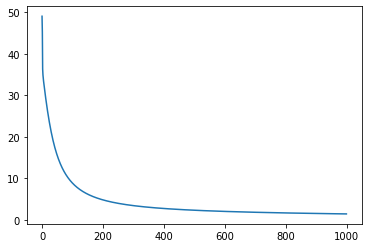

In [13]:
# Plotting the graph for the loss J decreases over time
x_arr = np.arange(0,1000,1)
loss_arr = np.array(loss_arr)
plt.plot(x_arr, loss_arr)

# Using k-Fold Estimate

In [14]:
# Custom evaluate function to get the predicted value of Y using the sigmoid activation
def evaluate(theta, X_test):
    # Initialise it with random bias
    bias = np.ones((1, 1))
    y_predicted = activation_func(np.dot(X_test, theta) + bias)
    for i, val in enumerate(y_predicted):
        if val >= 0.5:
            y_predicted[i] = 1
        else:
            y_predicted[i] = 0
    return y_predicted

In [ ]:
# Import data and create a 2-D matrix out of it
data = open('data-2.txt', 'r') 
Lines = data.readlines()
initial_data = []
for i, line in enumerate(Lines):
    initial_data.append(Lines[i].strip().split('\t'))
# Updating Class-1 and Class-2 into 0's and 1's
for i in initial_data:
    if i[2] == 'Class-1':
        i[2] = 0
    else:
        i[2] = 1

def k_fold():
    # Create training and test variables 
    # K-fold is 20-80% of the total data
    k_fold_value = int(len(initial_data) / 5)
    initial_val = 0
    error_arr = []
    for j in range(k_fold_value, len(initial_data) + 1, k_fold_value):
        X_train, Y_train, X_test, Y_test = [], [], [], []
        for i, val in enumerate(initial_data):
            
            if i > initial_val and i <= j:
                test = []
                test.append(float(val[0]))
                test.append(float(val[1]))
                X_test.append(test)
                Y_test.append(float(val[2]))
            else:
                test = []
                test.append(float(val[0]))
                test.append(float(val[1]))
                X_train.append(test)
                Y_train.append(float(val[2]))
        initial_val += k_fold_value
        
        # Calculate the coefficients of the polynomial
        theta, train_arr = perceptron_train(np.array(X_train), np.array(Y_train), 0.005, 500)
        
        # Predicted value of 'y'
        y_predicted = evaluate(np.array(theta), np.array(X_test))

        # Now, comparing the value of Y_test (actual values) with the predicted values of 'y'
        error = np.sum((y_predicted - Y_test) ** 2) / len(X_train)
        error_arr.append(error)
    return error_arr

errors = k_fold()
mean_error = sum(errors) / len(errors)
mean_error

-----  0  ----- ||  19.88489738215393
-----  1  ----- ||  19.771748627652116
-----  2  ----- ||  19.552503208335974
-----  3  ----- ||  19.14580792205779
-----  4  ----- ||  18.45792256638175
-----  5  ----- ||  17.48728858864027
-----  6  ----- ||  16.48702551363599
-----  7  ----- ||  15.819998305746012
-----  8  ----- ||  15.512137047636806
-----  9  ----- ||  15.363462088198466
-----  10  ----- ||  15.260246930438129
-----  11  ----- ||  15.169121614434696
-----  12  ----- ||  15.081301789643963
-----  13  ----- ||  14.994359198752935
-----  14  ----- ||  14.907610862502867
-----  15  ----- ||  14.820872334284815
-----  16  ----- ||  14.734103063252553
-----  17  ----- ||  14.647304050256054
-----  18  ----- ||  14.560488250875023
-----  19  ----- ||  14.473672017879187
-----  20  ----- ||  14.38687262178968
-----  21  ----- ||  14.300107524145748
-----  22  ----- ||  14.21339415541859
-----  23  ----- ||  14.126749838186639
-----  24  ----- ||  14.040191752291017
-----  25  ----- 

-----  255  ----- ||  4.1744706954226025
-----  256  ----- ||  4.160481624253821
-----  257  ----- ||  4.146590178521832
-----  258  ----- ||  4.132795408263119
-----  259  ----- ||  4.1190963748505265
-----  260  ----- ||  4.105492150841173
-----  261  ----- ||  4.0919818198264295
-----  262  ----- ||  4.078564476283927
-----  263  ----- ||  4.065239225431597
-----  264  ----- ||  4.05200518308373
-----  265  ----- ||  4.038861475508975
-----  266  ----- ||  4.025807239290325
-----  267  ----- ||  4.012841621187032
-----  268  ----- ||  3.999963777998417
-----  269  ----- ||  3.987172876429586
-----  270  ----- ||  3.97446809295902
-----  271  ----- ||  3.961848613707982
-----  272  ----- ||  3.9493136343117667
-----  273  ----- ||  3.936862359792744
-----  274  ----- ||  3.924494004435179
-----  275  ----- ||  3.9122077916618165
-----  276  ----- ||  3.900002953912181
-----  277  ----- ||  3.8878787325226014
-----  278  ----- ||  3.8758343776079247
-----  279  ----- ||  3.86386914794

-----  92  ----- ||  8.63779640570079
-----  93  ----- ||  8.561432605829893
-----  94  ----- ||  8.4861879382584
-----  95  ----- ||  8.412042318288975
-----  96  ----- ||  8.338976016621967
-----  97  ----- ||  8.266969656456961
-----  98  ----- ||  8.196004210314776
-----  99  ----- ||  8.12606099660847
-----  100  ----- ||  8.057121675989734
-----  101  ----- ||  7.9891682474954955
-----  102  ----- ||  7.9221830445176735
-----  103  ----- ||  7.856148730617377
-----  104  ----- ||  7.7910482952035
-----  105  ----- ||  7.726865049093963
-----  106  ----- ||  7.66358261997677
-----  107  ----- ||  7.601184947786489
-----  108  ----- ||  7.539656280010833
-----  109  ----- ||  7.478981166940738
-----  110  ----- ||  7.419144456876323
-----  111  ----- ||  7.360131291300142
-----  112  ----- ||  7.301927100028217
-----  113  ----- ||  7.244517596348439
-----  114  ----- ||  7.187888772155206
-----  115  ----- ||  7.132026893088287
-----  116  ----- ||  7.076918493683345
-----  117  -

-----  342  ----- ||  2.4263706626514896
-----  343  ----- ||  2.4190692242771292
-----  344  ----- ||  2.4118104184952722
-----  345  ----- ||  2.4045938763459183
-----  346  ----- ||  2.3974192330225383
-----  347  ----- ||  2.3902861278151857
-----  348  ----- ||  2.383194204054517
-----  349  ----- ||  2.376143109056726
-----  350  ----- ||  2.3691324940693317
-----  351  ----- ||  2.3621620142178346
-----  352  ----- ||  2.3552313284532334
-----  353  ----- ||  2.3483400995003487
-----  354  ----- ||  2.341487993806987
-----  355  ----- ||  2.334674681493887
-----  356  ----- ||  2.327899836305459
-----  357  ----- ||  2.3211631355613074
-----  358  ----- ||  2.3144642601084966
-----  359  ----- ||  2.307802894274567
-----  360  ----- ||  2.3011787258212903
-----  361  ----- ||  2.294591445899136
-----  362  ----- ||  2.2880407490024517
-----  363  ----- ||  2.281526332925326
-----  364  ----- ||  2.2750478987181486
-----  365  ----- ||  2.268605150644826
-----  366  ----- ||  2.2

-----  92  ----- ||  8.910066745808557
-----  93  ----- ||  8.824331712026364
-----  94  ----- ||  8.740146024974333
-----  95  ----- ||  8.657471449232187
-----  96  ----- ||  8.57627089999152
-----  97  ----- ||  8.496508403877357
-----  98  ----- ||  8.418149061169713
-----  99  ----- ||  8.341159009379078
-----  100  ----- ||  8.26550538813063
-----  101  ----- ||  8.191156305312727
-----  102  ----- ||  8.11808080444623
-----  103  ----- ||  8.046248833232147
-----  104  ----- ||  7.975631213236192
-----  105  ----- ||  7.906199610669821
-----  106  ----- ||  7.837926508228487
-----  107  ----- ||  7.770785177948985
-----  108  ----- ||  7.70474965504879
-----  109  ----- ||  7.639794712711498
-----  110  ----- ||  7.575895837783587
-----  111  ----- ||  7.513029207348843
-----  112  ----- ||  7.45117166614785
-----  113  ----- ||  7.3903007048111
-----  114  ----- ||  7.330394438875343
-----  115  ----- ||  7.271431588553787
-----  116  ----- ||  7.213391459231921
-----  117  ---

-----  342  ----- ||  2.659820852833417
-----  343  ----- ||  2.653040114479702
-----  344  ----- ||  2.6462996217589287
-----  345  ----- ||  2.6395990181505393
-----  346  ----- ||  2.6329379512578126
-----  347  ----- ||  2.626316072749222
-----  348  ----- ||  2.61973303830079
-----  349  ----- ||  2.6131885075393932
-----  350  ----- ||  2.606682143987033
-----  351  ----- ||  2.6002136150060204
-----  352  ----- ||  2.5937825917450894
-----  353  ----- ||  2.5873887490863883
-----  354  ----- ||  2.581031765593363
-----  355  ----- ||  2.574711323459488
-----  356  ----- ||  2.56842710845786
-----  357  ----- ||  2.5621788098915976
-----  358  ----- ||  2.5559661205450728
-----  359  ----- ||  2.5497887366359286
-----  360  ----- ||  2.5436463577678836
-----  361  ----- ||  2.5375386868843046
-----  362  ----- ||  2.531465430222532
-----  363  ----- ||  2.5254262972689405
-----  364  ----- ||  2.5194210007147357
-----  365  ----- ||  2.5134492564124478
-----  366  ----- ||  2.507